In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
## LOAD DATASET

In [3]:
###Excel File
Dta = pd.ExcelFile("C:/Users/HP/Documents/KPMG/KPMG_Data.xlsx")

###Excel Sheets
ts = Dta.parse('Transactions')
transactions = ts.copy()

cd = Dta.parse('CustomerDemographic')
cust_demo = cd.copy()

ca = Dta.parse('CustomerAddress')
cust_add = ca.copy()

nc = Dta.parse('NewCustomerList')
target_dta = nc.copy()

In [4]:
### MERGE ORIGINAL DATASET

In [5]:
df = pd.merge(ts, cd, how="outer", on = "customer_id")
df = pd.merge(df, ca, how="outer", on = "customer_id")
dta = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 20509
Data columns (total 30 columns):
transaction_id                         20000 non-null float64
product_id                             20000 non-null float64
customer_id                            20510 non-null int64
transaction_date                       20000 non-null datetime64[ns]
online_order                           19640 non-null float64
order_status                           20000 non-null object
brand                                  19803 non-null object
product_line                           19803 non-null object
product_class                          19803 non-null object
product_size                           19803 non-null object
list_price                             20000 non-null float64
standard_cost                          19803 non-null float64
product_first_sold_date                19803 non-null float64
first_name                             20504 non-null object
last_name               

In [7]:
## DATA QUALITY ASSESSMENT

In [8]:
def display_missing(data):
    m_col = []
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            print('{} columns missing values: {}'. format(col, data[col].isnull().sum()))
            m_col.append(col)
    print('\n',m_col)
    
display_missing(df)

transaction_id columns missing values: 510
product_id columns missing values: 510
transaction_date columns missing values: 510
online_order columns missing values: 870
order_status columns missing values: 510
brand columns missing values: 707
product_line columns missing values: 707
product_class columns missing values: 707
product_size columns missing values: 707
list_price columns missing values: 510
standard_cost columns missing values: 707
product_first_sold_date columns missing values: 707
first_name columns missing values: 6
last_name columns missing values: 661
gender columns missing values: 6
past_3_years_bike_related_purchases columns missing values: 6
DOB columns missing values: 463
job_title columns missing values: 2483
job_industry_category columns missing values: 3330
wealth_segment columns missing values: 6
deceased_indicator columns missing values: 6
default columns missing values: 1505
owns_car columns missing values: 6
tenure columns missing values: 463
address columns

In [9]:
print("##### Categorical Data #####")
cat_col = []
for col in df.columns.tolist():
    if df[col].dtype == 'object':
        print(col)
        print(df[col].value_counts(),'\n')
        cat_col.append(col)
print(cat_col)

##### Categorical Data #####
order_status
Approved     19821
Cancelled      179
Name: order_status, dtype: int64 

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64 

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64 

product_class
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64 

product_size
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64 

first_name
Corabelle    36
Tobe         31
Emlyn        29
Lindsay      28
Max          26
Catie        26
Gar          26
Keeley       25
Curran       24
Hubie        24
Ebba         24
Lauree       24
Mead         23
Andreas      23
Basile       23
Brita        23
Marcile      22
Brett        22
Nicko        22
Kristofor    21
Jayme        21
Benedicto    21
Shamus       21
Mercy        21
Fiel

In [10]:
df['DOB'].describe()

count                   20047
unique                   3448
top       1978-01-30 00:00:00
freq                       48
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

DatetimeIndex(['1843-12-21', '1931-10-23', '1935-08-22', '1940-09-22',
               '1943-08-11', '1944-01-24', '1953-08-09', '1953-08-17',
               '1953-08-31', '1953-09-05',
               ...
               '2001-11-19', '2001-11-30', '2001-12-08', '2001-12-19',
               '2002-01-01', '2002-01-06', '2002-01-09', '2002-01-15',
               '2002-01-26', '2002-03-11'],
              dtype='datetime64[ns]', name='DOB', length=3448, freq=None) 
 [ 89737. 101563.  25869. ...  40945.  50778.  46006.]


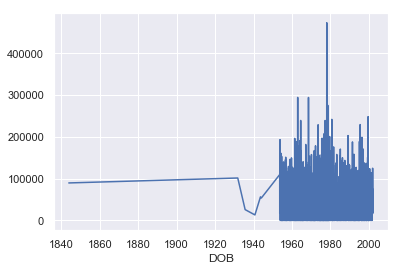

In [11]:
rs = df.groupby('DOB').transaction_id.sum()
print(rs.index,'\n', rs.values)
sns.lineplot(x = rs.index, y = rs.values)

In [12]:
df[['list_price', 'standard_cost']].mean()

list_price       1107.829449
standard_cost     556.046951
dtype: float64

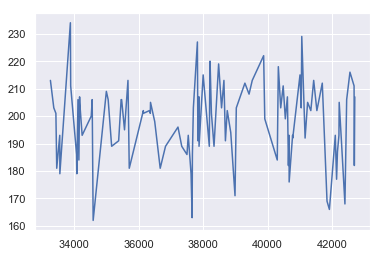

In [13]:
sns.lineplot(x = df.product_first_sold_date.value_counts().index, y = df.product_first_sold_date.value_counts().values)

In [14]:
## DATA CLEANING

In [15]:
### 2017 - 1843
## Clearly certain customers are already dead.
df['age'] = 2020 - df.DOB.apply(lambda x: int(x.strftime('%Y')) if x==x else None)

In [16]:
## Product_first_sold_date is a Date*
df.product_first_sold_date = pd.to_timedelta(df.product_first_sold_date, unit = 'D') + pd.to_datetime('1889-12-30')

In [17]:
#sns.lineplot(x = df.product_first_sold_date ].value_counts().index, y = df.product_first_sold_date.value_counts().values)

In [18]:
df.state = df.state.replace(to_replace = {'New South Wales': 'NSW', 'Victoria':'VIC'})
df.gender = df.gender.replace({'Female':'F', 'Femal':'F', 'Male':'M'})

In [19]:
df = df[(df['order_status'] == 'Approved') & (df['deceased_indicator'] == 'N')].reset_index()

In [20]:
drp = ['country', 'postcode', 'address', 
       'default', 'DOB', 'first_name', 
       'last_name', 'standard_cost', 'job_title',
       'transaction_date', 'order_status', 
       'deceased_indicator', 'index'] #'ob_title'

df.drop(columns = drp, inplace = True)
dta2 = df.copy()

In [21]:
### Partial Drop
na_drop = ['transaction_id', 'brand', 'online_order', 'tenure', 'state']

df.dropna(subset = na_drop, inplace = True)
df = df.reset_index(drop =True)

In [22]:
df.shape

(18809, 19)

In [23]:
##Columns present in both origin and target
col = []
for i in nc.columns.tolist():
    for j in df.columns.tolist():
        if i == j:
            col.append(i)
print(col)

['gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation']


In [24]:
drp = []
for i in df.columns.tolist():
    if i not in col:
        drp.append(i)
print(drp)

['transaction_id', 'product_id', 'customer_id', 'online_order', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'product_first_sold_date', 'age']


In [25]:
drp = [i for i in drp if i not in 
       ('transaction_id', 'product_id', 'customer_id','list_price', 'age')]

df.drop(columns = drp, inplace = True )

In [26]:
df.head().T

,0,1,2,3,4
transaction_id,1,11065,18923,2,6862
product_id,2,1,62,3,4
customer_id,2950,2950,2950,3120,3120
list_price,71.49,1403.5,478.16,2091.47,1129.13
gender,M,M,M,F,F
past_3_years_bike_related_purchases,19,19,19,89,89
job_industry_category,Financial Services,Financial Services,Financial Services,Health,Health
wealth_segment,Mass Customer,Mass Customer,Mass Customer,Mass Customer,Mass Customer
owns_car,Yes,Yes,Yes,Yes,Yes
tenure,10,10,10,10,10


In [27]:
df.job_industry_category.fillna('unknown', inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18809 entries, 0 to 18808
Data columns (total 13 columns):
transaction_id                         18809 non-null float64
product_id                             18809 non-null float64
customer_id                            18809 non-null int64
list_price                             18809 non-null float64
gender                                 18809 non-null object
past_3_years_bike_related_purchases    18809 non-null float64
job_industry_category                  18809 non-null object
wealth_segment                         18809 non-null object
owns_car                               18809 non-null object
tenure                                 18809 non-null float64
state                                  18809 non-null object
property_valuation                     18809 non-null float64
age                                    18809 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.9+ MB


In [29]:
## Revenue is a sum of all bought items per customer
revenue = df[['transaction_id', 'customer_id', 'list_price']].groupby('customer_id').list_price.sum()

## Quantity of product(s) purcahsed by count each occurence of identified transaction
quantity = df[['transaction_id', 'customer_id', 'list_price']].groupby('customer_id').transaction_id.count()

In [30]:
quantity.head(),revenue.head()

(customer_id
 1    11
 2     3
 4     2
 5     6
 6     5
 Name: transaction_id, dtype: int64, customer_id
 1    9084.45
 2    4149.07
 4    1047.72
 5    5903.20
 6    5931.69
 Name: list_price, dtype: float64)

In [31]:
df.shape

(18809, 13)

In [32]:
drp = ['transaction_id', 'product_id', 'list_price']

df.drop(columns = drp, inplace = True)

In [33]:
df.drop_duplicates(inplace = True)

In [34]:
df = pd.merge(df, quantity.to_frame(), how = 'left', on = 'customer_id')
df = pd.merge(df, revenue.to_frame(), how = 'left', on = 'customer_id')

In [35]:
### SOME GYMNASTICS
df.rename(columns = {'transaction_id': 'quantity', 'list_price':'revenue'}, inplace = True)

df.sort_values(by = 'customer_id', ascending = True, inplace = True)
df.set_index('customer_id', inplace = True)

In [36]:
df.head().T

customer_id,1,2,4,5,6
gender,F,M,M,F,M
past_3_years_bike_related_purchases,93,81,33,56,35
job_industry_category,Health,Financial Services,IT,unknown,Retail
wealth_segment,Mass Customer,Mass Customer,Mass Customer,Affluent Customer,High Net Worth
owns_car,Yes,Yes,No,Yes,Yes
tenure,11,16,7,8,13
state,NSW,NSW,QLD,NSW,VIC
property_valuation,10,10,9,4,9
age,67,40,59,43,54
quantity,11,3,2,6,5


### SCALING AND LABEL ENCODING_ PREPING FOR ML MODELLING

In [37]:
from sklearn.preprocessing import LabelEncoder as le

df['gender'] = le().fit_transform(df['gender'])
df['job_industry_category'] = le().fit_transform(df['job_industry_category'])
df['state'] = le().fit_transform(df['state'])

In [38]:
map1 = {'N':0, 'Y':1, 'No':0, 'Yes':1}
map2 = {'Mass Customer':0, 'Affluent Customer':1, 'High Net Worth':2}

df['owns_car'] = df['owns_car'].map(map1)
df['wealth_segment'] = df['wealth_segment'].map(map2)

In [39]:
X = df.drop(columns = ['revenue','quantity'])
y = df['revenue']
y2 = df['quantity']

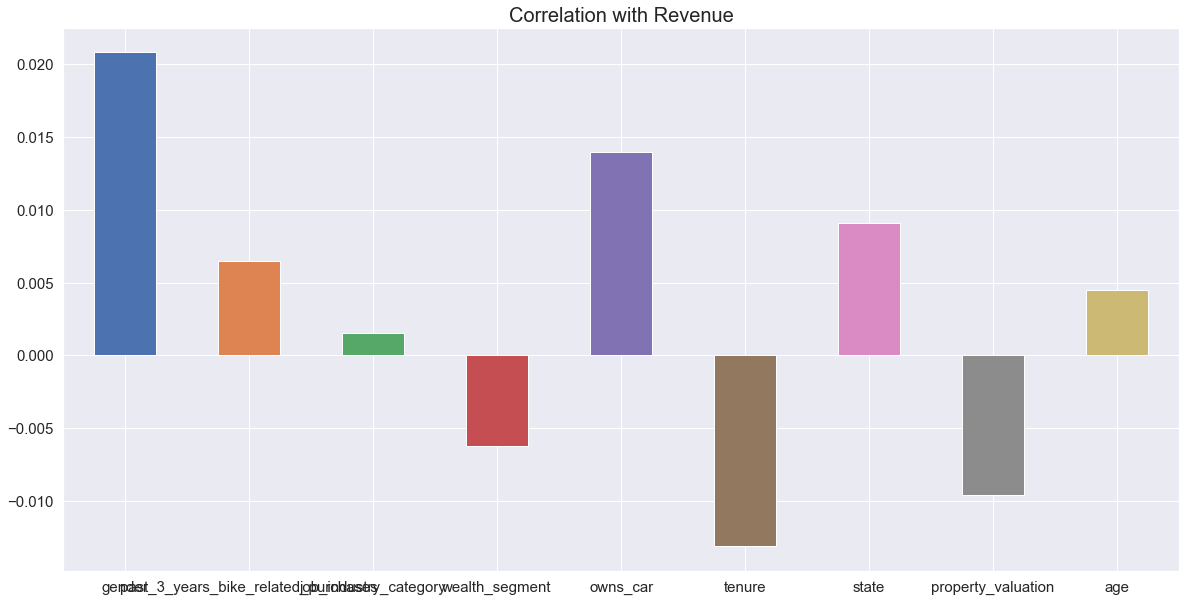

In [40]:
X.corrwith(df['revenue']).plot.bar(figsize = (20, 10), 
                       fontsize = 15, rot = 0,grid = True)
plt.title('Correlation with Revenue', fontsize=20)
plt.show()

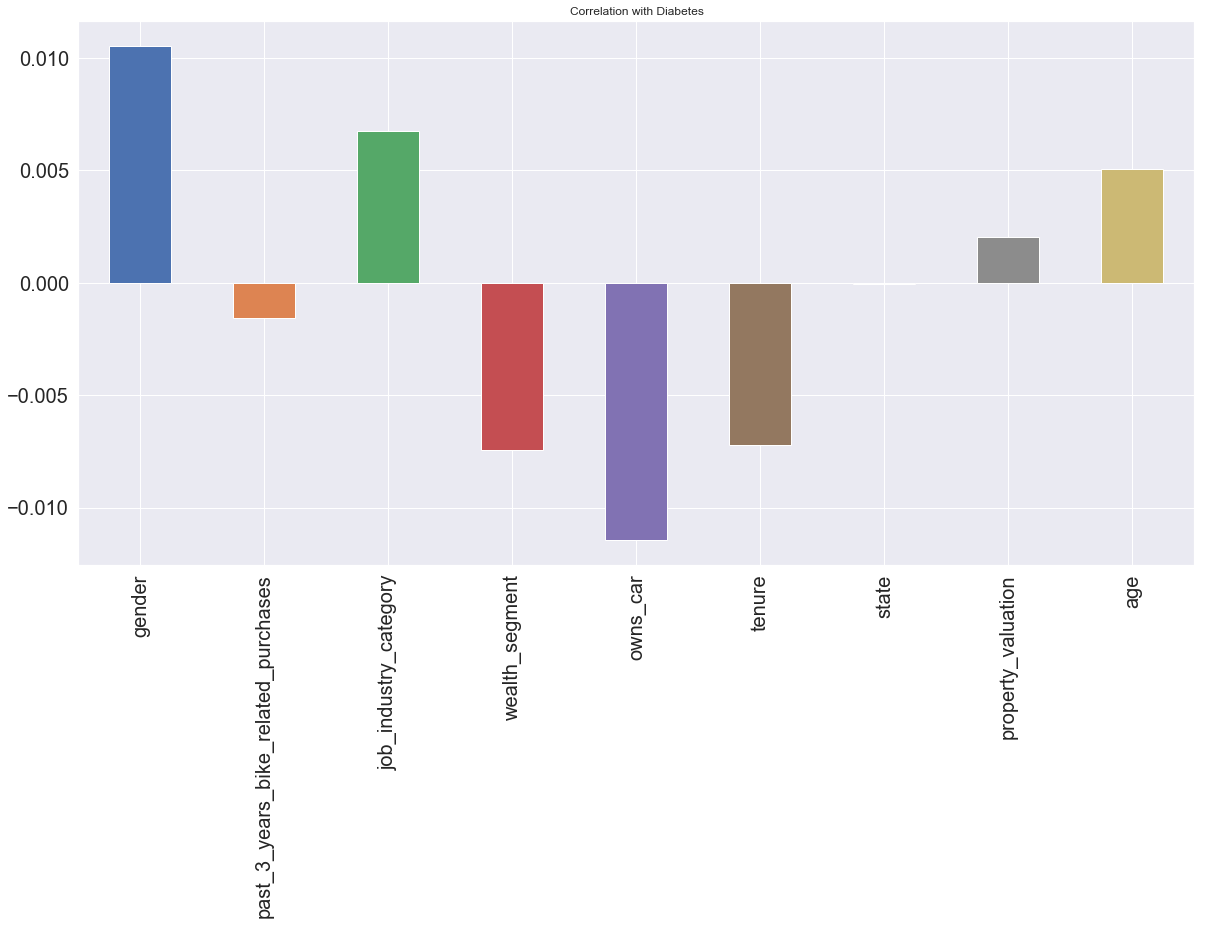

In [41]:
X.corrwith(df['quantity']).plot.bar(figsize = (20, 10), 
                       title = "Correlation with Diabetes", 
                       fontsize = 20, rot = 90,grid = True)
plt.show()

A preview of what to expect from our model, quantity pourchased seeme to be the only tangible influence on revenue.

In [42]:
df.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'age', 'quantity', 'revenue'],
      dtype='object')

### REGRESSION MODELS

In [43]:
### SPLIT Dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.20, 
                                                  random_state = 42)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
model = RandomForestRegressor(criterion = 'mse', 
                            max_depth = 1, random_state = 11)

model = Pipeline([('scalar', StandardScaler()),('rfr', model)])

model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=11, verbose=0, warm_start=False))])

In [45]:
X.rename(columns = {'past_3_years_bike_related_purchases':'3yrsPurchases', 'job_industry_category':'industry'}, inplace = True)
feats = X.columns.tolist()
feats

['gender',
 '3yrsPurchases',
 'industry',
 'wealth_segment',
 'owns_car',
 'tenure',
 'state',
 'property_valuation',
 'age']

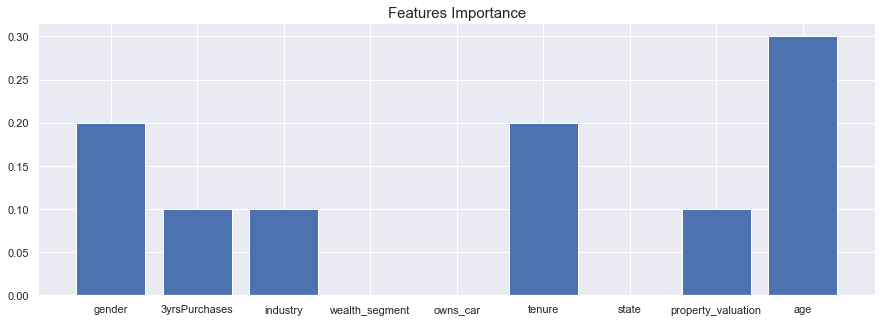

In [46]:
X_train = StandardScaler().fit_transform(X_train)
model2 = RandomForestRegressor(criterion = 'mse', 
                            max_depth = 1, random_state = 11)
model2.fit(X_train, y_train)

importance = model2.feature_importances_

#plot feature importance
plt.figure(figsize = (15, 5))
plt.bar([x for x in feats], importance)
plt.title('Features Importance', fontsize = 15)
plt.show()

In [47]:
dt = pd.DataFrame(list(zip(feats, importance)))
dt.rename(columns = {0:'Feature', 1:'Importance'}, inplace = True)

##Summarize Features Importance
dt.sort_values(by = 'Importance', ascending=False)

,Feature,Importance
8,age,0.3
0,gender,0.2
5,tenure,0.2
1,3yrsPurchases,0.1
2,industry,0.1
7,property_valuation,0.1
3,wealth_segment,0.0
4,owns_car,0.0
6,state,0.0


In [48]:
## PREDICTIONS

In [49]:
pred = model.predict(X_val)

In [50]:
pred_df = pd.DataFrame({'Auctual':y_val,
                         'Predicted': pred,
                         'Diff': (y_val - pred)})

print(pred_df.head(), '\n')
print(pred_df['Diff'].mean())

              Auctual    Predicted         Diff
customer_id                                    
37           11291.71  6145.134632  5146.575368
3490          4739.70  6175.886546 -1436.186546
2438          6007.49  6109.915430  -102.425430
1435          8853.71  6109.915430  2743.794570
236           5255.34  6145.134632  -889.794632 

-118.930837864039


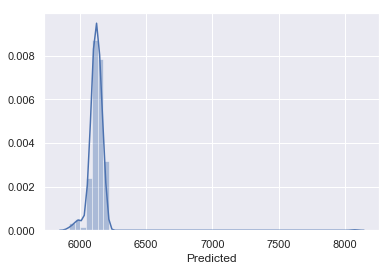

In [51]:
sns.distplot(pred_df['Predicted'])

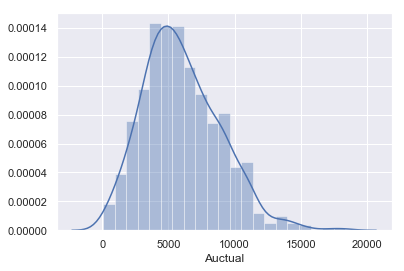

In [52]:
sns.distplot(pred_df['Auctual'])

In [53]:
pred_df['Predicted'].describe()

count     682.000000
mean     6121.454738
std        86.269582
min      5916.287727
25%      6105.574886
50%      6109.915430
75%      6145.134632
max      8074.604396
Name: Predicted, dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_hat = lm.predict(X_val)

In [55]:
pred_df = pd.DataFrame({'Auctual':y_val,
                         'Predicted': y_hat,
                         'Diff': (y_val - y_hat)})

print(pred_df.head(), '\n')
print(pred_df['Diff'].mean())

              Auctual    Predicted         Diff
customer_id                                    
37           11291.71  5655.128163  5636.581837
3490          4739.70  5881.675541 -1141.975541
2438          6007.49  5343.280054   664.209946
1435          8853.71  5031.670132  3822.039868
236           5255.34  5653.981141  -398.641141 

243.44019446249254


In [56]:
pred_df['Predicted'].describe()

count     682.000000
mean     5759.083706
std       420.015382
min      4718.858515
25%      5436.619915
50%      5767.609359
75%      6086.687468
max      6763.804576
Name: Predicted, dtype: float64

In [57]:
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val,pred)))

RMSE: 2902.9977915140826
